In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
ff_df=pd.read_csv("forestfires.csv")

In [3]:
ff_df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
ff_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
# No null values in the data

# Data visualization

<AxesSubplot:xlabel='month', ylabel='count'>

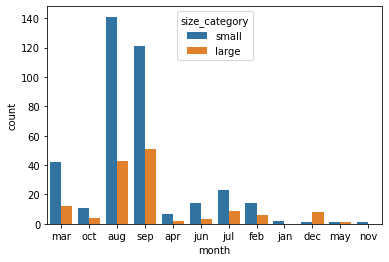

In [6]:
sns.countplot(x=ff_df['month'],hue=ff_df['size_category'])

#  
In aug and sep we have small and large fires when compared to the rest of the month

<AxesSubplot:xlabel='day', ylabel='count'>

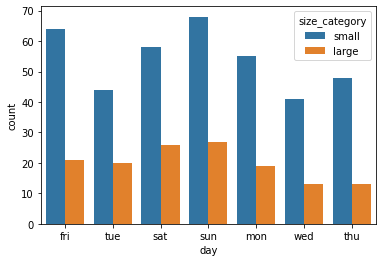

In [7]:
sns.countplot(x=ff_df['day'],hue=ff_df['size_category'])

On sunday there are little more forest fires than that on friday 

<AxesSubplot:xlabel='size_category', ylabel='FFMC'>

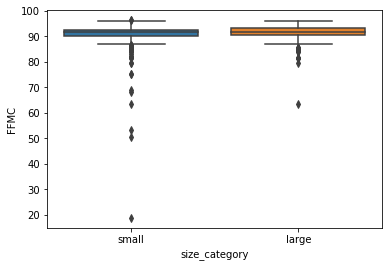

In [8]:
sns.boxplot(y=ff_df['FFMC'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='DMC'>

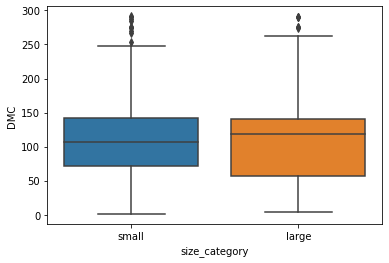

In [9]:
sns.boxplot(y=ff_df['DMC'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='DC'>

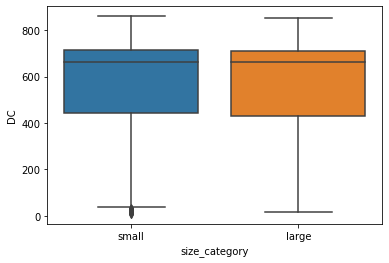

In [10]:
sns.boxplot(y=ff_df['DC'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='ISI'>

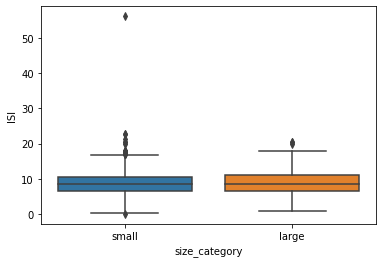

In [11]:
sns.boxplot(y=ff_df['ISI'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='temp'>

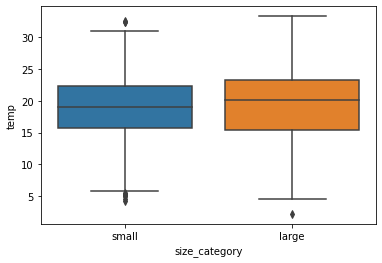

In [12]:
sns.boxplot(y=ff_df['temp'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='RH'>

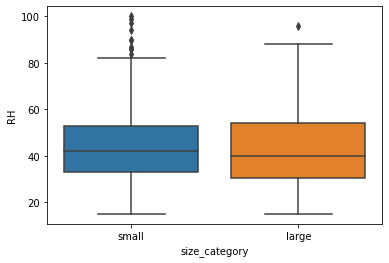

In [13]:
sns.boxplot(y=ff_df['RH'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='wind'>

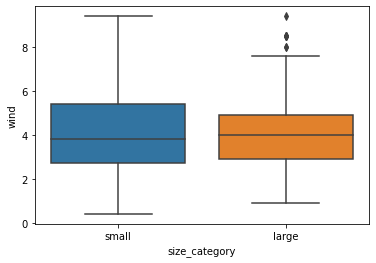

In [14]:
sns.boxplot(y=ff_df['wind'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='rain'>

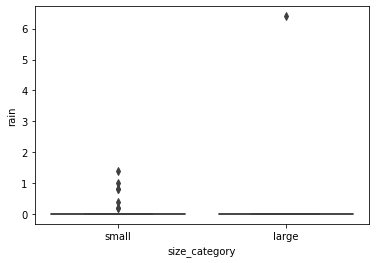

In [15]:
sns.boxplot(y=ff_df['rain'],x=ff_df['size_category'])

<AxesSubplot:xlabel='size_category', ylabel='area'>

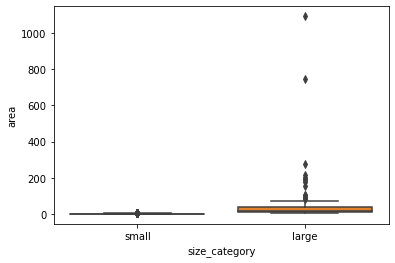

In [16]:
sns.boxplot(y=ff_df['area'],x=ff_df['size_category'])

 the distribution of rest of the variables is almost same for small and large fires

In [17]:
# removing columns which are already duplicated
ff_df=ff_df.drop(['month','day'],axis=1)

In [18]:
ff_df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


# Label Encoding

In [19]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [20]:
ff_df['size_category']=label_encoder.fit_transform(ff_df['size_category'])

# Normalizing the Data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
ff_df_norm=scaler.fit_transform(ff_df.iloc[:,0:-1])

In [23]:
ff_df_norm=pd.DataFrame(ff_df_norm)

# Train test split

In [24]:
x=ff_df_norm
y=ff_df.iloc[:,-1]


In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,
                                                random_state=40,
                                                shuffle=True)

# SVM

In [26]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
373,0.753489,1.743042,0.607926,1.070970,0.243205,-0.140366,-0.736124,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
428,0.753489,1.743042,0.607926,1.070970,1.260269,-0.631113,0.995798,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
47,0.644690,-0.759127,-0.423846,0.434316,0.708641,-0.508426,-0.512650,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,3.893103,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
167,0.971087,0.253619,0.091031,1.641763,0.777595,-0.692456,0.269509,-0.073268,-0.162551,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
361,0.336427,0.173912,0.975522,0.258687,-0.273947,0.043664,-0.009834,-0.073268,-0.140064,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,-0.062501,2.799547,1.240224,-0.356013,-0.463569,0.841128,-0.233308,-0.073268,-0.202020,2.254407,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,1.416268
165,-1.041690,-1.448356,-1.989056,-1.321971,-2.342553,1.577248,0.269509,-0.073268,-0.168369,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081
7,0.155096,0.539625,0.243154,0.368455,-1.877117,2.558742,-1.015466,-0.073268,-0.202020,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,-0.17286,-0.706081
219,-0.098768,-1.112337,-1.861547,-0.619456,-0.635953,-1.060516,-0.512650,-0.073268,0.298969,-0.443576,...,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.17286,-0.706081


In [27]:
# model using linear 

model_linear=svm.SVC(kernel='linear',C=1).fit(x_train,y_train)
pred_linear=model_linear.predict(x_test)

print(metrics.accuracy_score(y_test,pred_linear))


0.9615384615384616


In [28]:
# model using polynomial

model_poly=svm.SVC(kernel='poly',C=1,degree=20).fit(x_train,y_train)
pred_poly=model_poly.predict(x_test)

print(metrics.accuracy_score(y_test,pred_poly))

0.7596153846153846


In [29]:
# model using rbf 

model_rbf=svm.SVC(kernel='rbf',C=1,gamma=0.0001).fit(x_train,y_train)
pred_rbf=model_rbf.predict(x_test)

print(metrics.accuracy_score(y_test,pred_rbf))

0.7596153846153846


# Using GridsearchCV to find the best possible kernel and their parameters

In [30]:
param_grid = [{'kernel' : ["linear","poly","rbf","sigmoid"] ,
               'gamma' : [*range(1,50,10),0.1,0.001,0.00001] ,
                'C':[1,15,14,13,12,11,10,0.1]  }]

In [31]:
model=svm.SVC()
gsv=GridSearchCV(model,param_grid,cv=10).fit(x_train,y_train)

In [32]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 1, 'kernel': 'linear'}, 0.9830429732868758)

 98% accuracy is given for linear kernel and gamma =1 and C= 15